# Trabajo final - Semestre 2 (2020)
### Métodos estadísticos Avanzados en Ciencias de los Datos
###### Mateo Rios-Querubín; Sara Maria Mira-Puerta

### 1. Repositorio

El procesamiento de datos y análisis descriptivo se realizó en Python. La modelación y la evaluación de los resultados de ésta se realizaron en R. Toda la documentación y archivos se encuentra en el repositorio GIT __DIRECCIÓN GIT__. 

Las bases de datos *input* para el procesamiento de los datos y su posterior análisis descriptivo, se encuentran en la carpeta __nombre de la carpeta de inputs__, la base de datos consolidada y preparada para la modelación, la cuál es generada a través de los códigos en python, se guarda en la misma carpeta (__nombre de la carpeta de inputs__). El documento ejecutable que contiene código en R y Python (*script*) se encuentran en la carpeta __nombre de la carpeta de script__). Finalmente, los resultados de la modelación se guardan en la carpeta __nombre de la carpeta con resultados__.

### 2. Introducción

Las metodologías de modelación para la predicción de algún comportamiento/proceso/fenómeno ha sido relevante para numerosas áreas de estudio cómo el financiero. Dentro de los estudios financieros, la segmentación se los sectores permiten la comparación y estudio de los comportamientos de estos, evitando un sesgo en la interpretación derivado de una economía global. El estudio por sectores económicos permite conocer no solo su relevancia dentro de la economía, sino también su futuro desempeño dadas unas condiciones económicas específicas. Es decir, hay diferentes formas de estudiar los sectores, dos de ellas son: 1) estimar el comportamiento futuro de la economía a partir del efecto de los sectores económicos, y 2) estimar el comportamiento futuro de un sector económico a partir del comportamiento de la misma economía. Lo anterior puede sonar algo simplista, pero la interpretación de las variables necesarias y el tratamiento de estas puede llevar a resultados incoherentes de no tener cuidado con las metodologías de modelación y de tratamiento/transformación de los datos. Uno de los sectores económicos más relevantes (típicamente) para cualquier economía, es el sector hidrocarburos. Este mueve gran parte de las políticas económicas y ayuda a determinar el poder económico o incluso político de un estado. Sin desconocer que las fuentes alternativas y renovables emergentes marcan una tendencia ascendente que es constante, no solo en su frecuencia e intensidad de uso, y diversidad de tecnologías adaptables a ellas (que salen constantemente al mercado), sino también por las nuevas técnicas (cada vez más avanzadas) de recolección de estas, es de destacar que los hidrocarburos siguen siendo la fuente energética más representativa y dominante del mundo.

En general, hay diferentes indicadores macroeconómicos que aplican a todos los sectores económicos como el PIB, el índice de desempleo, la TRM, el balance fiscal, etc. También hay diferentes indicadores que cada sector debe deportar ante la superintendencia que le corresponda, como los costos de venta, los balances de cuenta corriente, los gastos de venta, las ventas, etc. Particularmente en este trabajo, buscaremos encontrar el comportamiento futuro de los costos de venta de sector hidrocarburos a partir de variables macroeconómicas en un modelo lineal clásico, generalizado y mixto.

### 3. Sobre la base empresas en el sector hidrocarburos

El sector hidrocarburos es aquel compuesto por actividades económicas que están relacionadas a la exploración, producción, transporte, refinación o procesamiento y comercialización de los recursos naturales no renovables (hodrocarburos). La Cadena de Valor de los hidrocarburos, consta de dos grandes áreas: Upstream y Downstream.

1. Upstream es la primera parte de la cadena donde se dan actividades de exploración sísmica, exploración perforatoria y producción (extracción). 
2. Downstram es la segunda parte de la cadena donde se dan actividades de refinamiento (procesamiento), trasporte y comercialización. 

La base estuvo compuesta por empresas pertenecientes al código CIIU:
* B0610: Extracción de petroleo crudo (Upstream: producción)
* B0620: Extracción de gas natural (Upstream: producción)
* B0910: Actividades de apoyo para la extracción de petróleo y de gas natural (Upstream: producción)

Este filtro se hizo con el objetivo de centrarnos en la parte de la cadena dedicada a la obtención del recurso unicamente. Pues el comportamiento de estas empresas debe estar ligado dirtectamente a mi misma condición (se puede o no extraer), mas no depende de otras condiciones o partes de la cadena de valor. 

Ahora bien, la combinación de empresas de extracción de gas y petroleo se debe a que antes de extraer el petroleo, se extrae el gas que se presenta en como una capa antecesora del petroleo (o agua si la hay). Ahora bien, es necesario hacer la salvedad de que si bien, tipicamente se encuentra petroleo después del gas, este no siempre es el caso ya sea por su ausencia, o por no ser de fácil extracción (para lo último se debe recurrir a métodos menos *avalados* por sus severas concecuencias ambientales como el *fracking*). Sin embargo, el comportamiento de la producción de ambos productos está altamente asociado. 


### 4. Consolidación de datos

Trabajamos con variables macroeconómicas del país (Colombia). 

__Fuentes:__

* TRM anualizada: https://www.banrep.gov.co/en/colombian-peso-market-exchange-rate

* Cuenta corriente anualizada: https://www.banrep.gov.co/es/estadisticas/balanza-pagos

* Inflación: https://www.dane.gov.co/index.php/estadisticas-por-tema/precios-y-costos/indice-de-precios-al-consumidor-ipc/ipc-informacion-tecnica#variaciones

* Desempleo: https://www.banrep.gov.co/es/estadisticas/tasas-empleo-y-desempleo

* Balance Fiscal: https://www.banrep.gov.co/es/series-estadisticas/see_finanzas_publi.htm

* Tasa de inversión (no anualizada): https://www.banrep.gov.co/es/estadisticas/tasas-interes-politica-monetaria

* PIB: https://www.banrep.gov.co/es/estadisticas/producto-interno-bruto-pib

* CV: http://pie.supersociedades.gov.co.


### 5. Transformación de datos

La trasnformación en los datos se basó principalmente modificar la frecuencia de los datos, ya que estaban dispares. Se buscó obtener datos de manera anual para cada empresa (NIT).

* PIB: este dato se encontró trimestral. Cada dato correspondía a la sumatoria de los tres meses corridos. Por lo anterior, el dato anual lo encontramos sumando los valores de cada trimestre para el mismo año. El archivo que contiene el PIB se llama __'pib_desestacionalizado_2015_019.xls'__.
* CV: El costo de ventas, que es la variable a predecir se encontró de manera anual. A esta variable no se le hicieron tranformaciones. La información de esta variable se encuentra en el archivo __'Plenas - Individuales year.xlsx'__.
* CV_dif: Es una variable creada con el objetivo de explicar la variación del costo de ventas respecto al año anterior para la misma empresa (NIT).
* IPC:La inflación se encontró anualizada y se consolidó en el archivo __'anexo_ipc_sep20.xlsx'__.
* TRM: La tasa representativa de mercado se encontró de manera mensual. Por ello, se se buscó la mediana anual de datos mensuales con el objetivo de encontrar un dato central insesgado ante datos atípicos. El archivo que contiene esta variables es __'1.1.1.EXR_Historical Data Series IQY.xlsx'__.
* BBC: El balance de cuenta corriente anualizada no se le hizo alguna tranformación. Esta variable la encontramos en el archivo __'1.1.1.BP_Resumen IQY.xlsx'__.
* TI: La tasa de inversión está en el archivo __'1.2.TIP_Serie histórica diaria IQY.xlsx'__. Este dato tambièn se encontrò atemporal a la frecuencia que buscabamos para la base de datos, por ello, se estimó con la mediana el dato central que representarìa el año. 
* TD: La tasa de desempleo tambièn fue un dato modificado a travez de la estimaciòn de la mediana para cada año. El archivo que contiene estos datos se llama __'1.1.1.EMP_Total nacional IQY.xlsx'__.
* BF: Al balance fiscal no se le hizo alguna transformación. Los datos se encuentran en el archivo __'BalanceFscal.xlsx'__.


### 6. Selección final de NITS o empresas.


In [2]:
# Importamos las librerías que necesitamos para la descripción de los datos
import pandas as pd
import os
import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Parametros

cwd = os.getcwd()
os.listdir(cwd)
file_nit = 'NIT_seleccion.xlsx'
file_base = 'Plenas - Individuales year.xlsx'
file_pib =  'pib_desestacionalizado_2015_019.xls'
file_ipc = 'anexo_ipc_sep20.xlsx'
file_desempleo = '1.1.1.EMP_Total nacional IQY.xlsx'
file_bf = 'BalanceFscal.xlsx'
file_bcc = '1.1.1.BP_Resumen IQY.xlsx'
file_tasaintervension = '1.2.TIP_Serie histórica diaria IQY.xlsx'
file_trm = '1.1.1.EXR_Historical Data Series IQY.xlsx'

In [ ]:
##############################################################################
# PIB anual total en millones de USD

df_pib = pd.read_excel(os.path.join(cwd, file_pib), sheet_name='srea15_019',
                       header=7)
df_pib = df_pib.iloc[:15]
df_pib = df_pib[[df_pib.columns[0], df_pib.columns[2]]]
df_pib.columns = ['YEAR', 'PIB']
df_pib.YEAR = list(x for x in range(2005, 2020))

##############################################################################
# IPC

df_ipc = pd.read_excel(os.path.join(cwd, file_ipc), sheet_name=1, header=8)
df_ipc = df_ipc.iloc[:10]
df_ipc = df_ipc[[df_ipc.columns[0], df_ipc.columns[-1]]]
df_ipc.columns = ['YEAR', 'IPC']

##############################################################################
# Desempleo

df_des_0 = pd.read_excel(os.path.join(cwd, file_desempleo),
                         sheet_name='Sheet1', header=8)
df_des_0 = df_des_0[[df_des_0.columns[0], df_des_0.columns[2]]]
df_des_0.columns = ['YEAR', 'TD']
df_des_0 = df_des_0.iloc[:68]
df_des_0.YEAR = list(int(x[:4]) for x in df_des_0.YEAR)

df_des = pd.DataFrame(columns=['YEAR', 'TD'])
for year in [2015, 2016, 2017, 2018, 2019]:
    df_des_t = df_des_0[df_des_0.YEAR == year]
    df_des = df_des.append(pd.DataFrame({'YEAR': [year],
                                         'TD': [df_des_t.TD.median()]}))

##############################################################################
# Balance Fiscal

df_bf = pd.read_excel(os.path.join(cwd, file_bf), sheet_name='Hoja1',
                      header=0)
df_bf = df_bf[[df_bf.columns[1], df_bf.columns[-1]]]
df_bf.columns = ['YEAR', 'BF']
df_bf.YEAR = list(int(x[:4]) for x in df_bf.YEAR)

bf_diff = [0]
for i in range(1, len(df_bf)):
    diff = (df_bf.BF.iloc[i] - df_bf.BF.iloc[i-1])/abs(df_bf.BF.iloc[i-1])
    bf_diff.append(diff)

df_bf['BFdif'] = bf_diff

##############################################################################
# Balance Cuenta Corriente en millones de USD corrientes

df_bcc = pd.read_excel(os.path.join(cwd, file_bcc), sheet_name='Sheet1',
                       header=10)
df_bcc = df_bcc.iloc[:1].T.reset_index(drop=False).iloc[1:21]
df_bcc.columns = ['YEAR', 'BCC']
df_bcc.YEAR = list(x for x in range(2000, 2020))

bcc_diff = [0]
for i in range(1, len(df_bcc)):
    diff = ((df_bcc.BCC.iloc[i] - df_bcc.BCC.iloc[i-1])
            /abs(df_bcc.BCC.iloc[i-1]))
    bcc_diff.append(diff)

df_bcc['BCCdif'] = bcc_diff

##############################################################################
# Tasa representativa de mercado

df_trm_0 = pd.read_excel(os.path.join(cwd, file_trm), sheet_name='Sheet1',
                         header=7)
df_trm_0 = df_trm_0.iloc[:2128]
df_trm_0 = df_trm_0[df_trm_0.columns[:2]]
df_trm_0.columns = ['YEAR', 'TRM']
df_trm_0.YEAR = list(x.year for x in df_trm_0.YEAR)

df_trm = pd.DataFrame(columns=['YEAR', 'TRM'])
for year in [2015, 2016, 2017, 2018, 2019]:
    df_trm_t = df_trm_0[df_trm_0.YEAR == year]
    df_trm = df_trm.append(pd.DataFrame({'YEAR': [year],
                                         'TRM': [df_trm_t.TRM.median()]}))

trm_diff = [0]
for i in range(1, len(df_trm)):
    diff = ((df_trm.TRM.iloc[i] - df_trm.TRM.iloc[i-1])
            /abs(df_trm.TRM.iloc[i-1]))
    trm_diff.append(diff)

df_trm['TRMdif'] = trm_diff

##############################################################################
# Tasa de intervensión (%)

df_ti_0 = pd.read_excel(os.path.join(cwd, file_tasaintervension),
                      sheet_name='Sheet1', header=7)
df_ti_0 = df_ti_0.iloc[:1417]
df_ti_0.columns = ['YEAR', 'TI']
df_ti_0.YEAR = list(x.year for x in df_ti_0.YEAR)

df_ti = pd.DataFrame(columns=['YEAR', 'TI'])
for year in [2015, 2016, 2017, 2018, 2019]:
    df_ti_t = df_ti_0[df_ti_0.YEAR == year]
    df_ti = df_ti.append(pd.DataFrame({'YEAR': [year],
                                       'TI': [df_ti_t.TI.median()]}))


In [ ]:
##############################################################################
## Df nits, generado previamente mediante filtros de Excel.

df_nit = pd.read_excel(os.path.join(cwd, file_nit))
df_nit.columns = list(x.upper() for x in df_nit.columns)

##############################################################################
# Nueva lista de NITs teniendo en cuenta la variable COSTO DE VENTAS.

print('Nueva lista de NITs.')
nits = 50*[0]
for year in [2015, 2016, 2017, 2018, 2019]:
    print(year)
    file =  file_base.replace('year', str(year))
    df_t = pd.read_excel(os.path.join(cwd, file),
                         sheet_name='ERI')

    df_t.columns = list(x.upper() for x in df_t.columns)
    if year in (2015, 2016, 2017):
        df_t = df_t[df_t.PERIODO == str(year)]
    else:
        df_t = df_t[df_t.PERIODO == 'Periodo Actual']
    df_t = df_t[df_t.NIT.isin(list(df_nit.NIT))]
    df_t = df_t[~pd.isna(df_t['COSTO DE VENTAS'])]
    df_t = df_t[df_t['COSTO DE VENTAS'] > 0]

    if len(df_t) < len(nits):
        nits = list(df_t.NIT)

for niti in [830111642, 830111971, 900252369, 900129967]:
    try:
        nits.remove(niti)
    except ValueError:
        print(f'nit {niti} no encontrado para eliminación.')

##############################################################################
# Columnas NIT, YEAR y COSTO DE VENTAS.

print('Columnas NIT, YEAR y COSTO DE VENTAS.')
df = pd.DataFrame (columns=['NIT', 'YEAR', 'COSTO DE VENTAS'])
for year in [2015, 2016, 2017, 2018, 2019]:
    print(year)
    file =  file_base.replace('year', str(year))
    df_t = pd.read_excel(os.path.join(cwd, file),
                         sheet_name='ERI')

    df_t.columns = list(x.upper() for x in df_t.columns)
    if year in (2015, 2016, 2017):
        df_t = df_t[df_t.PERIODO == str(year)]
    else:
        df_t = df_t[df_t.PERIODO == 'Periodo Actual']

    df_t = df_t[df_t.NIT.isin(nits)]
    df_t = df_t[['NIT', 'COSTO DE VENTAS']]
    df_t['YEAR'] = year
    df = df.append(df_t)

df_cvs = pd.DataFrame(columns=['NIT', 'YEAR', 'CV', 'CVdif'])
for niti in nits:
    df_nit = df[df.NIT == niti]

    cv_diff = [0]
    for i in range(1, len(df_nit)):
        diff = ((df_nit['COSTO DE VENTAS'].iloc[i]
                 - df_nit['COSTO DE VENTAS'].iloc[i-1])
                /abs(df_nit['COSTO DE VENTAS'].iloc[i-1]))
        cv_diff.append(diff)
    df_nit['CVdif'] = cv_diff
    df_nit.columns = ['NIT', 'YEAR', 'CV', 'CVdif']
    df_cvs = df_cvs.append(df_nit)

df = df_cvs.sort_values(by='YEAR', ascending=True)

df_base_copy = df.copy(deep=True)

##############################################################################
# Columnas PIB, IPC, Desempleo, Balance Cuenta Corriente, Tasa intervensión,
# TRM

if False:
    df = df_base_copy

print('Columna PIB')
df = (df.set_index('YEAR').join(df_pib.set_index('YEAR'))).reset_index()

print('Columna IPC')
df = (df.set_index('YEAR').join(df_ipc.set_index('YEAR'))).reset_index()

print('Columna Desempleo')
df = (df.set_index('YEAR').join(df_des.set_index('YEAR'))).reset_index()

print('Columna BalanceF')
df = (df.set_index('YEAR').join(df_bf.set_index('YEAR'))).reset_index()

print('Columna BalanceCC')
df = (df.set_index('YEAR').join(df_bcc.set_index('YEAR'))).reset_index()

print('Columna Tasa Intervensión')
df = (df.set_index('YEAR').join(df_ti.set_index('YEAR'))).reset_index()

print('Columna TRM')
df = (df.set_index('YEAR').join(df_trm.set_index('YEAR'))).reset_index()

print(df)

if False:
    df.to_excel('final_MEA_1.xlsx')

Debido a que hay unas variables para las cuales sacamos el cambio porcentual del año *i* respecto año *i-1*, Se adquirieron datos desde el 2015, sin embargo, para el posterior análisis, los datos correspondientes a este año no son necesarios.

Acontinuación se lee la base de datos producto del procesamiento y se elimina todo dato perteneciente al 2015.

In [3]:
data=pd.read_excel('final_MEA_1.xlsx').drop('Unnamed: 0', axis=1)
display(data.head())
data=data.drop(data[data.YEAR==2015].index)

,YEAR,NIT,CV,CVdif,PIB,IPC,TD,BF,BFdif,BCC,BCCdif,TI,TRM,TRMdif
0,2015,860002426,874735556,0.0,5.47763,5.35,8.89717,-24268.589476,0.0,-18564.197282,0.060695,4.5,2661.52,0.0
1,2015,830001324,34918371,0.0,5.47763,5.35,8.89717,-24268.589476,0.0,-18564.197282,0.060695,4.5,2661.52,0.0
2,2015,900319038,5071637,0.0,5.47763,5.35,8.89717,-24268.589476,0.0,-18564.197282,0.060695,4.5,2661.52,0.0
3,2015,860052872,39013180,0.0,5.47763,5.35,8.89717,-24268.589476,0.0,-18564.197282,0.060695,4.5,2661.52,0.0
4,2015,800206842,437597590,0.0,5.47763,5.35,8.89717,-24268.589476,0.0,-18564.197282,0.060695,4.5,2661.52,0.0


In [4]:
print('Número de datos/empresas por año:', len(data.NIT.unique()))

Número de datos/empresas por año: 26


Probamos que no hayan datos nulos sobre la variable a predecir. En caso de haberlos, lo que se busca es eliminar el NIT (en todos sus años) que tiene un dato nulo en el costo de ventas (CV) de por lo menos 1 año.

In [207]:
print(len(data))
no_nit=data[data['CV'].isnull()].NIT.unique()
data=data.drop(data[data.NIT.isin(no_nit)].index)
print(len(data))

104
104


In [208]:
display(data[data.columns[2:]].describe())

,CV,CVdif,PIB,IPC,TD,BF,BFdif,BCC,BCCdif,TI,TRM,TRMdif
count,1.040000e+02,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.295981e+08,1.325760,7.191957,4.572500,9.501680,-31231.445076,-0.040683,-12285.617317,0.042965,5.562500,3030.222500,0.055964
std,4.700825e+08,9.886565,0.431230,1.589437,0.574836,3449.145312,0.234114,1336.224195,0.235516,1.391614,148.060331,0.073970
min,0.000000e+00,-1.000000,6.562883,3.230000,8.935789,-34925.475549,-0.439123,-13747.751763,-0.280912,4.250000,2898.320000,-0.020328
25%,2.919406e+07,-0.159668,6.974403,3.672500,9.105862,-33958.368887,-0.082090,-13275.182049,-0.106253,4.250000,2931.222500,-0.016265
50%,9.762521e+07,0.003156,7.227379,3.895000,9.317469,-31975.890044,0.067816,-12576.919728,0.050562,5.250000,2972.715000,0.056741
75%,4.871904e+08,0.301181,7.444933,4.795000,9.713287,-29248.966233,0.109223,-11587.354995,0.199780,6.562500,3071.715000,0.128970
max,2.382582e+09,99.107003,7.750187,7.270000,10.435993,-26048.524666,0.140760,-10240.878050,0.351646,7.500000,3277.140000,0.130703


Con el objetivo de ver las variablkes en una misma escala, y poder identificar su correlación a partir de la centralización de los datos, se estandarizan las variables de la base de datos.

In [5]:
for i in data.columns[2:]:
    data[i]=(data[i]-data[i].mean())/data[i].std()

In [6]:
print('Número de datos por año:', len(data.NIT.unique()))

Número de datos por año: 26


In [7]:
display(data[data.columns[2:]].describe())

,CV,CVdif,PIB,IPC,TD,BF,BFdif,BCC,BCCdif,TI,TRM,TRMdif
count,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02
mean,4.109960e-17,-3.976520e-17,-1.608969e-14,-3.701099e-15,-2.985219e-14,2.284497e-15,-1.364293e-15,-1.769952e-14,-1.143316e-15,-6.362432e-16,-3.969901e-14,4.953303e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.011496e-01,-2.352445e-01,-1.458791e+00,-8.446387e-01,-9.844385e-01,-1.070999e+00,-1.701908e+00,-1.094228e+00,-1.375178e+00,-9.431494e-01,-8.908700e-01,-1.031401e+00
25%,-6.390455e-01,-1.502471e-01,-5.044964e-01,-5.662382e-01,-6.885751e-01,-7.906086e-01,-1.768682e-01,-7.405679e-01,-6.335795e-01,-9.431494e-01,-6.686464e-01,-9.764730e-01
50%,-4.934728e-01,-1.337778e-01,8.214244e-02,-4.262515e-01,-3.204579e-01,-2.158346e-01,4.634433e-01,-2.180041e-01,3.225992e-02,-2.245594e-01,-3.884059e-01,1.050052e-02
75%,3.352437e-01,-1.036334e-01,5.866388e-01,1.399867e-01,3.681172e-01,5.747739e-01,6.403115e-01,5.225637e-01,6.658394e-01,7.185900e-01,2.802405e-01,9.869735e-01
max,4.367285e+00,9.890315e+00,1.294506e+00,1.697142e+00,1.625354e+00,1.502668e+00,7.750215e-01,1.530237e+00,1.310658e+00,1.392268e+00,1.667682e+00,1.010400e+00


#### Costo de venta
Al graficar el comportamiento del costo de venta para cada una de las empresas seleccionadas, nos damos cuenta de que hay por lo menos 1 dato atípico de forma (NIT 900331322) y un dato atípico de forma y magnitud (NIT 830126302). 

El primero, si bien se cuenta con valores que están en el rango de las demás curvas, su comportamiento no es normal por los cambiuos en pendientes de un punto a otro, respecto a las demás curvas). 

El segúndo viene siendo mas un dato atípico de magnitud ya que sus valores no se encuentran en el dominio de valores de las demás curvas, y adicionalmente, los cambios en su comportamiento no es típico respecto al resto de empresas. 

Pudiendo haber identificado esto de manera visual, se procede a eliminar de manera manual estos datos. Cabe resaltar que esto no es escalable o replicable si se tuviese un portafolio grande. Para ello, habría que recurrir a tecnicas de detección de outliers en datos funcionales cómo el OutlierGram que propone Arribas-Gil y Ramos (2014). Pues estos son series de tiempo, aunque en nuestro ejercicio, no sean series extensas. 

Paper del OutlierGram: *https://www.researchgate.net/publication/260758235_Shape_outlier_detection_and_visualization_for_functional_data_The_outliergram*

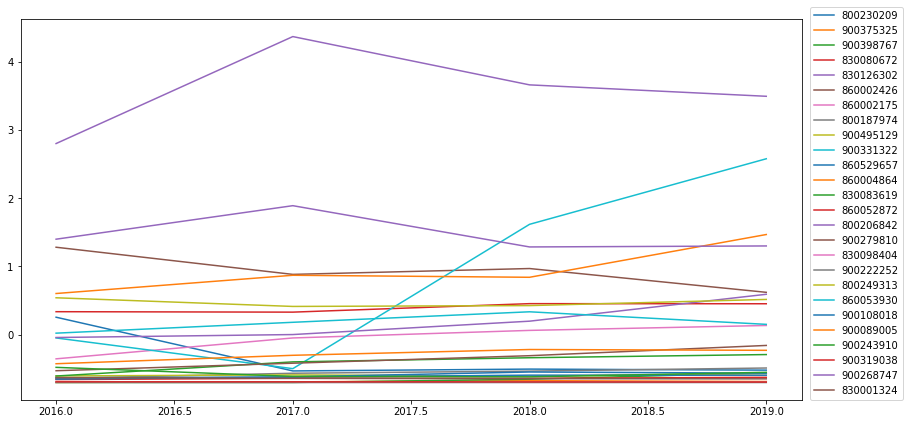

In [212]:
plt.figure(figsize=(14,7))
for i in data.NIT.unique():
    plt.plot(data[data.NIT==i].YEAR,data[data.NIT==i]['CV'], label=i)
plt.legend(loc=(1.01,0))
plt.show()

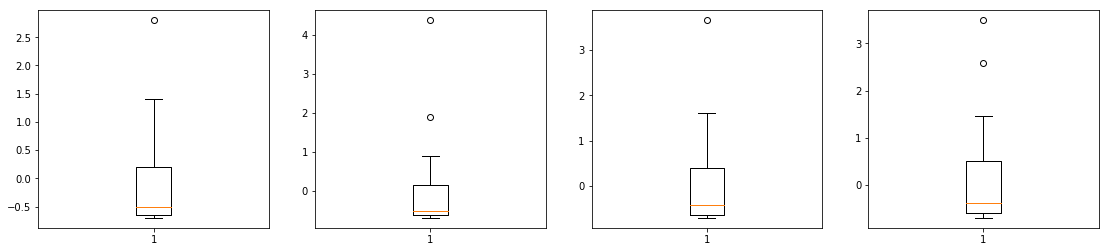

In [213]:
plt.figure(figsize=(19,4))
plt.subplot(141)
plt.boxplot(data[data.YEAR==2016]['CV'])
plt.subplot(142)
plt.boxplot(data[data.YEAR==2017]['CV'])
plt.subplot(143)
plt.boxplot(data[data.YEAR==2018]['CV'])
plt.subplot(144)
plt.boxplot(data[data.YEAR==2019]['CV'])
plt.show()

Una vez hemos filtrado estas empresas, tenemos un portafolio final para la modelación que consiste en 24 empresas. 

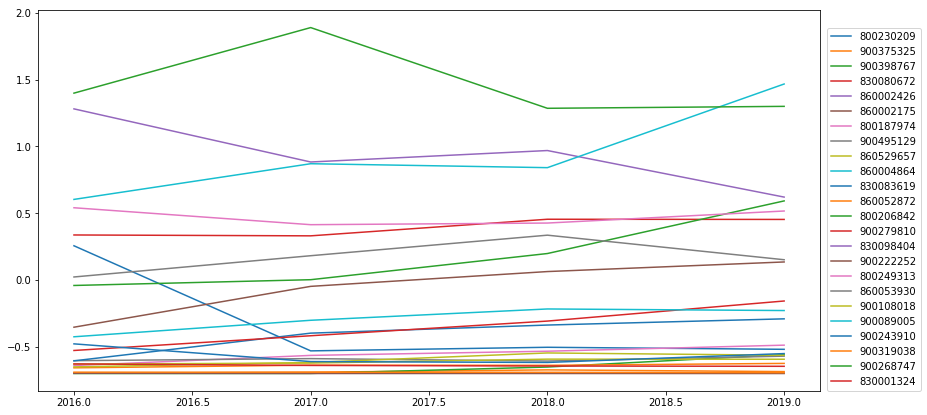

In [214]:
data=data.drop(data[data.NIT.isin([830126302,900331322])].index)
plt.figure(figsize=(14,7))
for i in data.NIT.unique():
    plt.plot(data[data.NIT==i].YEAR,data[data.NIT==i]['CV'], label=i)
plt.legend(loc=(1.01,0))
plt.show()

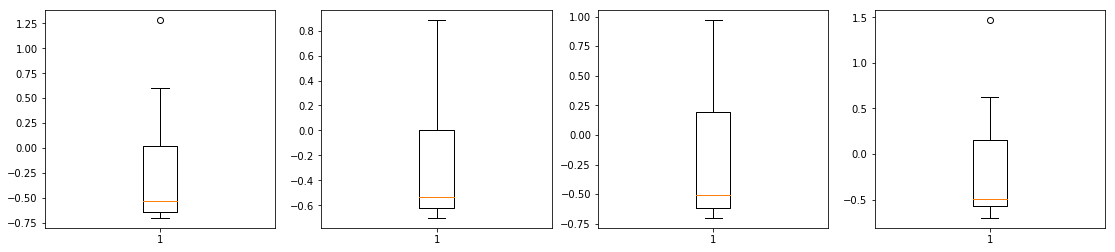

In [195]:
plt.figure(figsize=(19,4))
plt.subplot(141)
plt.boxplot(data[data.YEAR==2016]['CV'])
plt.subplot(142)
plt.boxplot(data[data.YEAR==2017]['CV'])
plt.subplot(143)
plt.boxplot(data[data.YEAR==2018]['CV'])
plt.subplot(144)
plt.boxplot(data[data.YEAR==2019]['CV'])
plt.show()

#### Costo de ventas - histograma


Ahora bien, para toda la serie de tiempo, es evidente que la mayoría de los datos tienen una alta variabilidad que está en el orden de 14 unidades de desviación sobre el dato centrado. Y son mas bien pocos los datos que se parecen a la medida central.

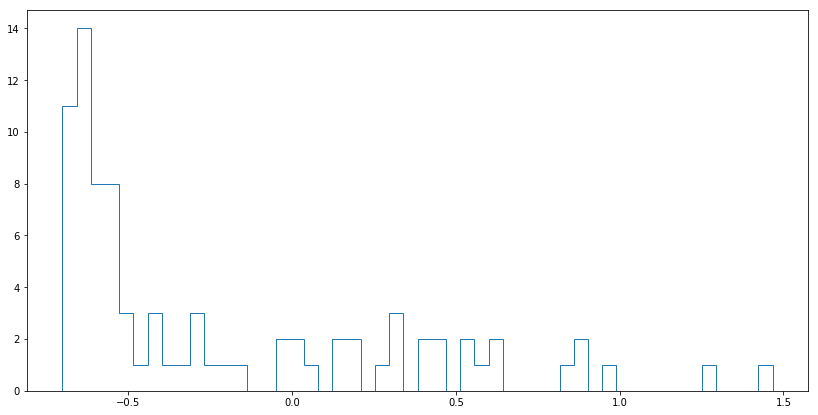

In [196]:
plt.figure(figsize=(14,7))
plt.hist(data['CV'], bins=50, histtype="step")
plt.show()

#### Matriz de Correlación

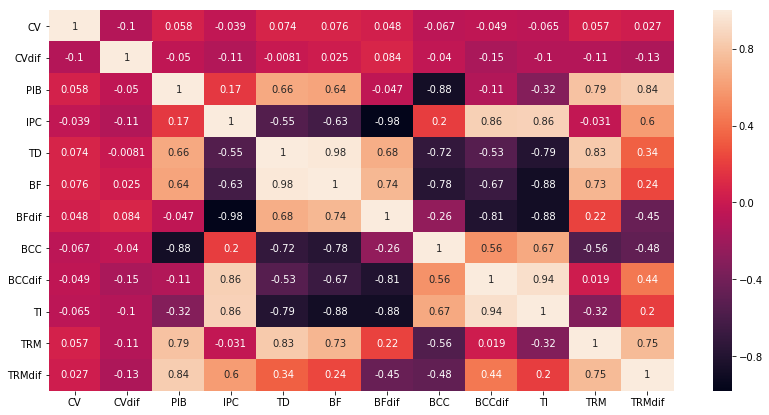

In [197]:
correlation_mat = data[data.columns[2:]].corr()
plt.figure(figsize=(14,7))
sns.heatmap(correlation_mat, annot = True)
plt.show()

#### Matriz de Covarianza

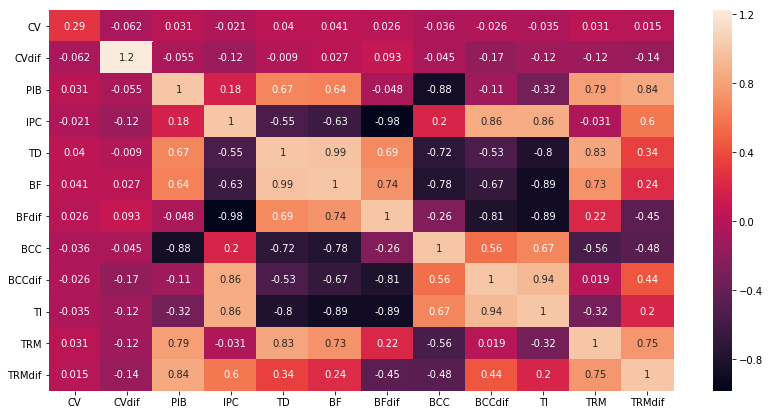

In [198]:
plt.figure(figsize=(14,7))
covariace_mat = data[data.columns[2:]].cov()
sns.heatmap(covariace_mat, annot = True)
plt.show()

In [199]:
data.to_excel('final_MEA.xlsx')